In [1]:
#importation du package
import h2o

In [2]:
#démarrage H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) Client VM (build 25.45-b02, mixed mode)


C:\ProgramData\Anaconda3\lib\site-packages\h2o\backend\server.py:385: UserWarning:   You have a 32-bit version of Java. H2O works best with 64-bit Java.
  Please download the latest 64-bit Java SE JDK from Oracle.

  warn("  You have a 32-bit version of Java. H2O works best with 64-bit Java.\n"


  Starting server from C:\ProgramData\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\ADMINI~1\AppData\Local\Temp\tmpk3gp1b0m
  JVM stdout: C:\Users\ADMINI~1\AppData\Local\Temp\tmpk3gp1b0m\h2o_Administrateur_started_from_python.out
  JVM stderr: C:\Users\ADMINI~1\AppData\Local\Temp\tmpk3gp1b0m\h2o_Administrateur_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.2
H2O_cluster_version_age:,2 months and 11 days
H2O_cluster_name:,H2O_from_python_Administrateur_nasxk8
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,247.5 Mb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"accepting new members, healthy"


# Prétraitement des données

In [3]:
#changer le répertoire courant
import os
os.chdir("C:/Users/Administrateur/Documents/H20 ipynb")

In [4]:
#chargement des données
cardio = h2o.import_file("cardio.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [5]:
#affichage des premières valeurs
print(cardio.head(10))

id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62,110,80,1,1,0,0,1,0
1,20228,1,156,85,140,90,3,1,0,0,1,1
2,18857,1,165,64,130,70,3,1,0,0,0,1
3,17623,2,169,82,150,100,1,1,0,0,1,1
4,17474,1,156,56,100,60,1,1,0,0,0,0
8,21914,1,151,67,120,80,2,2,0,0,0,0
9,22113,1,157,93,130,80,3,1,0,0,1,0
12,22584,2,178,95,130,90,3,3,0,0,1,1
13,17668,1,158,71,110,70,1,1,0,0,1,0
14,19834,1,164,68,110,60,1,1,0,0,0,0


In [6]:
#affichage du type
print(type(cardio))

<class 'h2o.frame.H2OFrame'>


In [7]:
#dimension
print(cardio.shape)

(70000, 13)


In [8]:
#affichage de la liste des colonnes
print(cardio.col_names)

['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']


In [9]:
# Resume de donnée
cardio.describe()

Rows:70000
Cols:13




,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
type,int,int,int,int,real,int,int,int,int,int,int,int,int
mins,0.0,10798.0,1.0,55.0,10.0,-150.0,-70.0,1.0,1.0,0.0,0.0,0.0,0.0
mean,49972.41989999998,19468.86581428571,1.3495714285714273,164.35922857142862,74.20568999999999,128.81728571428567,96.63041428571428,1.3668714285714283,1.2264571428571436,0.08812857142857143,0.053771428571428574,0.8037285714285715,0.4997
maxs,99999.0,23713.0,2.0,250.0,200.0,16020.0,11000.0,3.0,3.0,1.0,1.0,1.0,1.0
sigma,28851.30232317291,2467.2516672414017,0.4768380155828637,8.210126364538034,14.395756678511377,154.01141945609132,188.4725302963903,0.6802503486993811,0.5722702766138451,0.2834838167699352,0.22556770360410489,0.3971790635049283,0.5000034814661862
zeros,1,0,0,0,0,0,21,0,0,63831,66236,13739,35021
missing,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.0,18393.0,2.0,168.0,62.0,110.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,20228.0,1.0,156.0,85.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0,1.0
2,2.0,18857.0,1.0,165.0,64.0,130.0,70.0,3.0,1.0,0.0,0.0,0.0,1.0


In [10]:
# vérifier les types de données analysés par H2O
cardio.types

{'id': 'int',
 'age': 'int',
 'gender': 'int',
 'height': 'int',
 'weight': 'real',
 'ap_hi': 'int',
 'ap_lo': 'int',
 'cholesterol': 'int',
 'gluc': 'int',
 'smoke': 'int',
 'alco': 'int',
 'active': 'int',
 'cardio': 'int'}

In [11]:
cardio["cardio"] = cardio["cardio"].asfactor()

In [12]:
#cardio est bien un type facteur
cardio['cardio'].isfactor() 

[True]

In [13]:
#nombre de niveaux (modalités) de "diabete"
cardio['cardio'].levels()

[['0', '1']]

# Subdivision en échantillons d’apprentissage et de test

In [14]:
#subdivision
cardioTrain,cardioTest = cardio.split_frame(ratios=[0.8],seed=1)

In [15]:
#vérification train
cardioTrain.shape

(56007, 13)

In [16]:
#vérification test
cardioTest.shape

(13993, 13)

# Modèles de Machine Learning H2O : Prédiction des maladies cardiaques

# Modèle 1 : Random forest

In [17]:
#random forest
from h2o.estimators import H2ORandomForestEstimator

In [18]:
x = cardioTrain.col_names[:-1] 
x

['id',
 'age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active']

In [19]:
y=cardio.col_names[-1]
y

'cardio'

In [20]:
#instanciation
rf = H2ORandomForestEstimator(seed=1, nfolds=5, model_id="rf",
     ntrees=200,
     max_depth=30,
     stopping_rounds=2,
     stopping_tolerance=0.01,
     score_each_iteration=True)

In [21]:
#apprentissage
rf.train(x=x, y=y, training_frame=cardioTrain)

drf Model Build progress: |███████████████████████████████████████████████| 100%


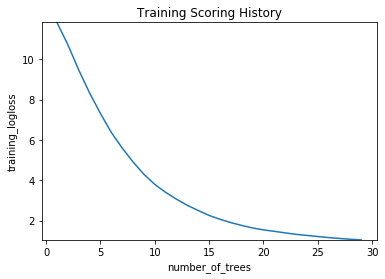

In [22]:
#evolution de l'apprentissage
rf.plot()

In [23]:
#résumé
rf.summary()


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,29.0,29.0,4029837.0,30.0,30.0,30.0,10438.0,11578.0,11052.207


In [24]:
#affichage
rf.show()

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,29.0,29.0,4029837.0,30.0,30.0,30.0,10438.0,11578.0,11052.207




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.2036909877312715
RMSE: 0.4513213796523177
LogLoss: 1.0472604630956661
Mean Per-Class Error: 0.29515391831013504
AUC: 0.7605602495399105
AUCPR: 0.7447028114740423
Gini: 0.521120499079821

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36365493542527855: 


,,0,1,Error,Rate
0,0,15236.0,12739.0,0.4554,(12739.0/27975.0)
1,1,5221.0,22811.0,0.1863,(5221.0/28032.0)
2,Total,20457.0,35550.0,0.3207,(17960.0/56007.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.363655,0.717530,239.0
1,max f2,0.004385,0.834968,398.0
2,max f0point5,0.571446,0.713256,153.0
3,max accuracy,0.541815,0.704805,165.0
4,max precision,0.958566,0.844556,14.0
5,max recall,0.000000,1.000000,399.0
6,max specificity,0.999997,0.984808,0.0
7,max absolute_mcc,0.541815,0.411036,165.0
8,max min_per_class_accuracy,0.500010,0.693155,181.0
9,max mean_per_class_accuracy,0.541815,0.704846,165.0



Gains/Lift Table: Avg response rate: 50,05 %, avg score: 50,12 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.047833,1.000000,1.681752,1.681752,0.841732,1.000000,0.841732,1.000000,0.080444,0.080444,68.175241,68.175241,0.065287
1,2,0.050012,0.988974,1.768692,1.685539,0.885246,0.993372,0.843627,0.999711,0.003853,0.084297,76.869175,68.553913,0.068640
2,3,0.105433,0.900000,1.665187,1.674841,0.833441,0.922284,0.838273,0.959011,0.092287,0.176584,66.518673,67.484077,0.142446
3,4,0.153124,0.857143,1.614231,1.655964,0.807937,0.874778,0.828825,0.932777,0.076983,0.253567,61.423135,65.596393,0.201092
4,5,0.215598,0.800000,1.544013,1.623524,0.772792,0.821789,0.812588,0.900616,0.096461,0.350029,54.401306,62.352367,0.269135
5,6,0.300498,0.714286,1.441645,1.572137,0.721556,0.751290,0.786869,0.858426,0.122396,0.472424,44.164531,57.213736,0.344203
6,7,0.408270,0.600000,1.252536,1.487771,0.626905,0.652044,0.744643,0.803947,0.134989,0.607413,25.253573,48.777125,0.398691
7,8,0.510115,0.500000,1.039265,1.398227,0.520161,0.537453,0.699825,0.750741,0.105843,0.713256,3.926489,39.822697,0.406697
8,9,0.599996,0.394724,0.822365,1.311961,0.411601,0.437420,0.656648,0.703805,0.073916,0.787172,-17.763472,31.196081,0.374732
9,10,0.701823,0.300000,0.695767,1.222558,0.348238,0.342843,0.611901,0.651433,0.070848,0.858019,-30.423256,22.255814,0.312711




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.19346623584480488
RMSE: 0.4398479690129362
LogLoss: 0.6190823543606799
Mean Per-Class Error: 0.2818953119070353
AUC: 0.7762727124573066
AUCPR: 0.7597919480310206
Gini: 0.5525454249146131

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38223638286126355: 


,,0,1,Error,Rate
0,0,16244.0,11731.0,0.4193,(11731.0/27975.0)
1,1,5292.0,22740.0,0.1888,(5292.0/28032.0)
2,Total,21536.0,34471.0,0.3039,(17023.0/56007.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.382236,0.727645,242.0
1,max f2,0.100615,0.837320,366.0
2,max f0point5,0.592447,0.730107,154.0
3,max accuracy,0.546509,0.718053,170.0
4,max precision,0.967484,0.865052,6.0
5,max recall,0.000046,1.000000,399.0
6,max specificity,0.999977,0.998820,0.0
7,max absolute_mcc,0.546509,0.438448,170.0
8,max min_per_class_accuracy,0.489900,0.714710,195.0
9,max mean_per_class_accuracy,0.546509,0.718105,170.0



Gains/Lift Table: Avg response rate: 50,05 %, avg score: 50,20 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010159,0.967742,1.727592,1.727592,0.864675,0.985670,0.864675,0.985670,0.017551,0.017551,72.759151,72.759151,0.014799
1,2,0.020176,0.960000,1.713052,1.720373,0.857398,0.962248,0.861062,0.974042,0.017159,0.034710,71.305159,72.037302,0.029098
2,3,0.031996,0.935484,1.699177,1.712543,0.850453,0.943788,0.857143,0.962865,0.020084,0.054795,69.917704,71.254281,0.045643
3,4,0.042727,0.925926,1.655553,1.698230,0.828619,0.928079,0.849979,0.954129,0.017765,0.072560,65.555303,69.822987,0.059727
4,5,0.050208,0.920000,1.688020,1.696708,0.844869,0.920869,0.849218,0.949173,0.012628,0.085188,68.801952,69.670849,0.070032
5,6,0.100095,0.875000,1.677605,1.687188,0.839656,0.893709,0.844452,0.921530,0.083690,0.168878,67.760546,68.718764,0.137708
6,7,0.150071,0.838235,1.661046,1.678482,0.831368,0.853374,0.840095,0.898833,0.083012,0.251891,66.104620,67.848212,0.203848
7,8,0.203885,0.794118,1.599566,1.657653,0.800597,0.813201,0.829670,0.876231,0.086080,0.337971,59.956650,65.765265,0.268445
8,9,0.301623,0.705882,1.507782,1.609089,0.754658,0.748948,0.805363,0.834986,0.147367,0.485338,50.778226,60.908872,0.367805
9,10,0.401164,0.600000,1.292675,1.530577,0.646996,0.652840,0.766067,0.789790,0.128674,0.614013,29.267544,53.057688,0.426131




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.6965689,0.00500723,0.68885326,0.696102,0.7024347,0.6964141,0.6990405
1,auc,0.776263,0.004009069,0.7756584,0.7730693,0.77467716,0.77467036,0.78323966
2,aucpr,0.7597324,0.0045673577,0.7624629,0.7576347,0.7533,0.76004446,0.76522
3,err,0.3034311,0.00500723,0.31114677,0.30389795,0.29756528,0.3035859,0.30095956
4,err_count,3398.8,55.782616,3492.0,3407.0,3361.0,3378.0,3356.0
5,f0point5,0.6857879,0.0047237575,0.67857784,0.6858292,0.6918133,0.6867532,0.6859662
6,f1,0.72801626,0.004813609,0.72268105,0.72539693,0.72805244,0.72836924,0.73558146
7,f2,0.7758623,0.009927481,0.77291566,0.7698098,0.7682981,0.7753544,0.7929336
8,lift_top_group,1.7168936,0.034274522,1.7159022,1.7191662,1.6674864,1.7175714,1.7643415
9,logloss,0.6190586,0.011921326,0.61782265,0.6138325,0.6326343,0.6283477,0.602656



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2021-01-28 20:20:30,37.490 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2021-01-28 20:20:30,37.736 sec,1.0,0.595357,11.820245,0.639459,0.607521,1.280344,0.502930
2,,2021-01-28 20:20:31,37.908 sec,2.0,0.582589,10.722862,0.646468,0.615802,1.299885,0.500783
3,,2021-01-28 20:20:31,38.074 sec,3.0,0.567442,9.468607,0.655637,0.624506,1.325145,0.501488
4,,2021-01-28 20:20:31,38.232 sec,4.0,0.553045,8.329476,0.665199,0.634159,1.349055,0.373494
5,,2021-01-28 20:20:31,38.389 sec,5.0,0.540499,7.311625,0.673797,0.644044,1.377476,0.377739
6,,2021-01-28 20:20:31,38.648 sec,6.0,0.528180,6.373432,0.683367,0.653458,1.403100,0.368252
7,,2021-01-28 20:20:32,38.883 sec,7.0,0.518854,5.599549,0.689959,0.661036,1.427178,0.379031
8,,2021-01-28 20:20:32,39.141 sec,8.0,0.509595,4.909078,0.697837,0.669048,1.449207,0.365118
9,,2021-01-28 20:20:32,39.319 sec,9.0,0.500646,4.295484,0.706597,0.678693,1.476650,0.359882



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,age,51419.511719,1.000000,0.200374
1,ap_hi,47065.410156,0.915322,0.183406
2,id,40776.289062,0.793012,0.158899
3,weight,35104.593750,0.682710,0.136797
4,height,31632.037109,0.615176,0.123265
5,ap_lo,25020.437500,0.486594,0.097501
6,cholesterol,10056.023438,0.195568,0.039187
7,gender,4304.793945,0.083719,0.016775
8,gluc,3964.414307,0.077099,0.015449
9,active,3127.366943,0.060821,0.012187


In [25]:
#ou tabulaire
import pandas as pd
pd.DataFrame(rf.varimp())

,0,1,2,3
0,age,51419.511719,1.000000,0.200374
1,ap_hi,47065.410156,0.915322,0.183406
2,id,40776.289062,0.793012,0.158899
3,weight,35104.593750,0.682710,0.136797
4,height,31632.037109,0.615176,0.123265
5,ap_lo,25020.437500,0.486594,0.097501
6,cholesterol,10056.023438,0.195568,0.039187
7,gender,4304.793945,0.083719,0.016775
8,gluc,3964.414307,0.077099,0.015449
9,active,3127.366943,0.060821,0.012187


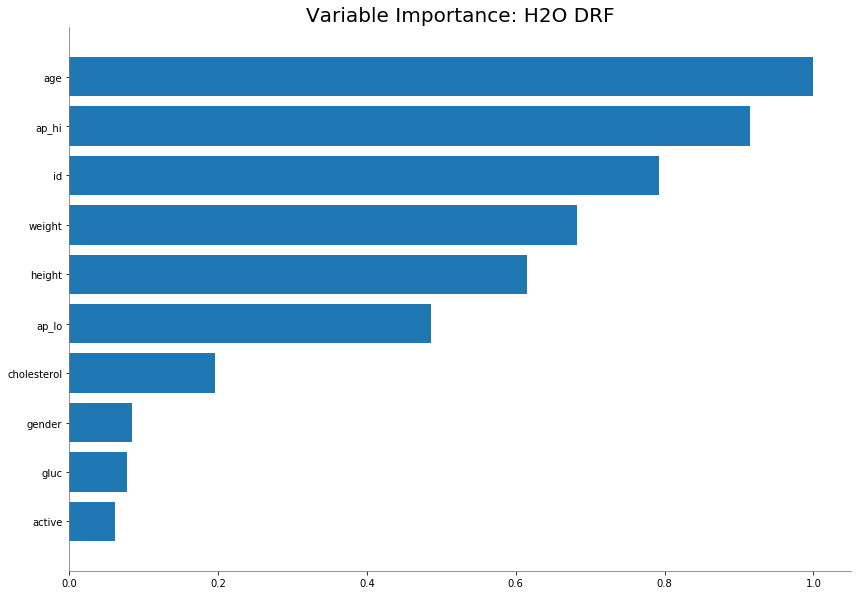

In [26]:
#importance - graphique
rf.varimp_plot()

In [27]:
#evaluation
rf.model_performance(cardioTest)


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.1932603156185623
RMSE: 0.4396138255543862
LogLoss: 0.61689784771367
Mean Per-Class Error: 0.27953074494813557
AUC: 0.7759074822259334
AUCPR: 0.7604561529082023
Gini: 0.5518149644518668

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.39063150461377766: 


,,0,1,Error,Rate
0,0,4245.0,2801.0,0.3975,(2801.0/7046.0)
1,1,1433.0,5514.0,0.2063,(1433.0/6947.0)
2,Total,5678.0,8315.0,0.3026,(4234.0/13993.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.390632,0.722579,233.0
1,max f2,0.076872,0.834184,380.0
2,max f0point5,0.597450,0.731661,145.0
3,max accuracy,0.540081,0.720860,166.0
4,max precision,0.982796,0.888889,4.0
5,max recall,0.000040,1.000000,399.0
6,max specificity,0.999839,0.998865,0.0
7,max absolute_mcc,0.568946,0.444900,156.0
8,max min_per_class_accuracy,0.482751,0.714732,188.0
9,max mean_per_class_accuracy,0.540081,0.720469,166.0



Gains/Lift Table: Avg response rate: 49,65 %, avg score: 49,83 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.018438,0.965517,1.741000,1.741000,0.864341,0.976373,0.864341,0.976373,0.032100,0.032100,74.099968,74.099968,0.027133
1,2,0.020010,0.958966,1.922694,1.755276,0.954545,0.962219,0.871429,0.975261,0.003023,0.035123,92.269390,75.527566,0.030014
2,3,0.044594,0.931034,1.739048,1.746330,0.863372,0.935853,0.866987,0.953536,0.042752,0.077875,73.904789,74.632958,0.066096
3,4,0.050382,0.919540,1.666109,1.737113,0.827160,0.925000,0.862411,0.950258,0.009644,0.087520,66.610865,73.711271,0.073753
4,5,0.126635,0.862069,1.680115,1.702792,0.834114,0.882168,0.845372,0.909258,0.128113,0.215633,68.011544,70.279212,0.176745
5,6,0.169871,0.827586,1.634706,1.685463,0.811570,0.835729,0.836769,0.890543,0.070678,0.286311,63.470599,68.546266,0.231244
6,7,0.208962,0.793103,1.598144,1.669128,0.793419,0.802029,0.828659,0.873984,0.062473,0.348784,59.814411,66.912776,0.277679
7,8,0.300150,0.698276,1.548574,1.632502,0.768809,0.744823,0.810476,0.834744,0.141212,0.489996,54.857366,63.250228,0.377024
8,9,0.408919,0.586207,1.274457,1.537265,0.632720,0.642201,0.763195,0.783529,0.138621,0.628617,27.445695,53.726548,0.436309
9,10,0.500036,0.479119,0.965261,1.433034,0.479216,0.525988,0.711448,0.736600,0.087952,0.716568,-3.473944,43.303419,0.430023


In [28]:
#prediction - de nouveau voir le seuil d'affectation
predRf = rf.predict(cardioTest).as_data_frame()
print(predRf.head(10))

drf prediction progress: |████████████████████████████████████████████████| 100%
   predict        p0        p1
0        1  0.206897  0.793103
1        0  0.655172  0.344828
2        0  0.724138  0.275862
3        1  0.467884  0.532116
4        1  0.176012  0.823988
5        1  0.052874  0.947126
6        1  0.258621  0.741379
7        0  0.775862  0.224138
8        0  0.671182  0.328818
9        0  0.741379  0.258621


In [29]:
#scikit-learn
from sklearn import metrics
#F1-score
print(metrics.f1_score(cardioTest.as_data_frame()["cardio"],predRf.predict,pos_label=1))

0.7211862788773626


# Modèle 2 : Gradient boosting

In [30]:
#gradient boosting
from h2o.estimators import H2OGradientBoostingEstimator

In [31]:
#instanciation
gb = H2OGradientBoostingEstimator(distribution="bernoulli", ntrees=50, max_depth=3, min_rows=2, learn_rate=0.2, nfolds=5)

In [32]:
#apprentissage
gb.train(x=x, y=y, training_frame=cardioTrain)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


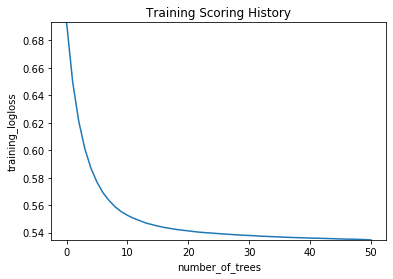

In [33]:
#évolution
gb.plot()

In [34]:
#résumé
gb.summary()


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,7891.0,3.0,3.0,3.0,5.0,8.0,7.94


In [35]:
#affichage
gb.show()

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1611861553922_342


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,7891.0,3.0,3.0,3.0,5.0,8.0,7.94




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.1779928606140518
RMSE: 0.42189200112594194
LogLoss: 0.5347327499388773
Mean Per-Class Error: 0.2600348816213106
AUC: 0.8078490616877022
AUCPR: 0.7959357192924584
Gini: 0.6156981233754044

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37615134585429205: 


,,0,1,Error,Rate
0,0,17480.0,10495.0,0.3752,(10495.0/27975.0)
1,1,5110.0,22922.0,0.1823,(5110.0/28032.0)
2,Total,22590.0,33417.0,0.2786,(15605.0/56007.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.376151,0.746050,243.0
1,max f2,0.201341,0.844849,336.0
2,max f0point5,0.566070,0.758085,154.0
3,max accuracy,0.508041,0.739908,181.0
4,max precision,0.944773,1.000000,0.0
5,max recall,0.050051,1.000000,398.0
6,max specificity,0.944773,1.000000,0.0
7,max absolute_mcc,0.508041,0.483008,181.0
8,max min_per_class_accuracy,0.450503,0.736550,208.0
9,max mean_per_class_accuracy,0.508041,0.739965,181.0



Gains/Lift Table: Avg response rate: 50,05 %, avg score: 50,05 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010017,0.888560,1.827018,1.827018,0.914439,0.896885,0.914439,0.896885,0.018301,0.018301,82.701759,82.701759,0.016585
1,2,0.020015,0.881535,1.776763,1.801913,0.889286,0.884859,0.901873,0.890877,0.017765,0.036066,77.676316,80.191279,0.032134
2,3,0.030014,0.876789,1.776763,1.793535,0.889286,0.878977,0.897680,0.886913,0.017765,0.053831,77.676316,79.353457,0.047683
3,4,0.040013,0.873017,1.748221,1.782211,0.875000,0.874867,0.892012,0.883903,0.017480,0.071311,74.822078,78.221118,0.062661
4,5,0.050012,0.869935,1.816009,1.788968,0.908929,0.871379,0.895395,0.881399,0.018158,0.089469,81.600894,78.896832,0.078996
5,6,0.100005,0.856414,1.753929,1.771452,0.877857,0.863104,0.886627,0.872253,0.087686,0.177155,75.392926,77.145192,0.154456
6,7,0.149999,0.843515,1.696844,1.746586,0.849286,0.849893,0.874182,0.864801,0.084832,0.261986,69.684450,74.658574,0.224203
7,8,0.200029,0.829058,1.664972,1.726173,0.833333,0.836734,0.863965,0.857781,0.083298,0.345284,66.497217,72.617324,0.290807
8,9,0.299998,0.745857,1.581887,1.678092,0.791749,0.798425,0.839900,0.838001,0.158141,0.503425,58.188712,67.809218,0.407267
9,10,0.400004,0.553611,1.321990,1.589063,0.661668,0.633630,0.795340,0.786906,0.132206,0.635631,32.198969,58.906258,0.471734




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.18011811705367514
RMSE: 0.4244032481657924
LogLoss: 0.540282743234226
Mean Per-Class Error: 0.26406883133179093
AUC: 0.8020242619439649
AUCPR: 0.7836853261952996
Gini: 0.6040485238879298

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3620963591044405: 


,,0,1,Error,Rate
0,0,16551.0,11424.0,0.4084,(11424.0/27975.0)
1,1,4715.0,23317.0,0.1682,(4715.0/28032.0)
2,Total,21266.0,34741.0,0.2882,(16139.0/56007.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.362096,0.742899,250.0
1,max f2,0.182671,0.843558,343.0
2,max f0point5,0.586581,0.753918,149.0
3,max accuracy,0.494711,0.735890,188.0
4,max precision,0.931745,1.000000,0.0
5,max recall,0.039888,1.000000,399.0
6,max specificity,0.931745,1.000000,0.0
7,max absolute_mcc,0.539356,0.475488,168.0
8,max min_per_class_accuracy,0.452064,0.732726,207.0
9,max mean_per_class_accuracy,0.494711,0.735931,188.0



Gains/Lift Table: Avg response rate: 50,05 %, avg score: 50,05 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010017,0.890688,1.691683,1.691683,0.846702,0.897455,0.846702,0.897455,0.016945,0.016945,69.168296,69.168296,0.013871
1,2,0.020015,0.882903,1.748221,1.719927,0.875000,0.886502,0.860839,0.891983,0.017480,0.034425,74.822078,71.992665,0.028849
2,3,0.030014,0.877721,1.705407,1.715090,0.853571,0.880279,0.858418,0.888084,0.017052,0.051477,70.540721,71.508972,0.042969
3,4,0.040031,0.873576,1.737982,1.720818,0.869875,0.875571,0.861285,0.884953,0.017409,0.068886,73.798165,72.081781,0.057768
4,5,0.050012,0.870352,1.722755,1.721204,0.862254,0.871957,0.861478,0.882360,0.017195,0.086080,72.275475,72.120437,0.072211
5,6,0.100005,0.856223,1.733236,1.727219,0.867500,0.863059,0.864488,0.872711,0.086651,0.172731,73.323603,72.721913,0.145600
6,7,0.149999,0.843068,1.698272,1.717571,0.850000,0.849896,0.859660,0.865107,0.084903,0.257634,69.827162,71.757111,0.215489
7,8,0.200011,0.827085,1.673413,1.706530,0.837558,0.835460,0.854133,0.857694,0.083690,0.341324,67.341295,70.652959,0.282915
8,9,0.299998,0.746540,1.600514,1.671195,0.801071,0.798230,0.836448,0.837875,0.160031,0.501356,60.051397,67.119526,0.403125
9,10,0.400039,0.552414,1.310107,1.580895,0.655720,0.629558,0.791252,0.785779,0.131064,0.632420,31.010696,58.089498,0.465235




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.713533,0.010911124,0.7193683,0.7068981,0.718502,0.724953,0.69794357
1,auc,0.80207485,0.0033918307,0.80702245,0.8035309,0.801722,0.79975295,0.79834604
2,aucpr,0.78383553,0.0050883815,0.7908352,0.78446555,0.7766403,0.7846924,0.7825441
3,err,0.28646702,0.010911124,0.28063172,0.2931019,0.281498,0.275047,0.30205643
4,err_count,3208.8,122.41814,3163.0,3259.0,3157.0,3072.0,3393.0
5,f0point5,0.70015275,0.013392236,0.7066986,0.6890486,0.70088416,0.7185495,0.6855829
6,f1,0.7439748,0.004676877,0.7512778,0.7393426,0.7424329,0.74561113,0.7412097
7,f2,0.7940172,0.012515685,0.80185986,0.7975566,0.78921807,0.7747909,0.8066605
8,lift_top_group,1.6891943,0.027254036,1.7354293,1.6814317,1.6891711,1.6740953,1.6658446
9,logloss,0.54028404,0.003744378,0.5353291,0.5376631,0.54110277,0.54290056,0.5444246



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2021-01-28 20:21:04,13.856 sec,0.0,0.500000,0.693147,0.500000,0.500509,1.000000,0.499491
1,,2021-01-28 20:21:04,13.950 sec,1.0,0.477974,0.649862,0.768415,0.759181,1.683106,0.308283
2,,2021-01-28 20:21:04,13.966 sec,2.0,0.463113,0.621085,0.776567,0.765168,1.686497,0.306158
3,,2021-01-28 20:21:04,13.997 sec,3.0,0.452938,0.601170,0.782346,0.769594,1.698518,0.306230
4,,2021-01-28 20:21:04,14.012 sec,4.0,0.445803,0.586991,0.785560,0.778271,1.769033,0.306230
5,,2021-01-28 20:21:04,14.091 sec,5.0,0.440786,0.576763,0.792143,0.782168,1.772632,0.293731
6,,2021-01-28 20:21:04,14.132 sec,6.0,0.437096,0.568982,0.795319,0.783539,1.772632,0.294445
7,,2021-01-28 20:21:04,14.145 sec,7.0,0.434378,0.563328,0.796666,0.783960,1.772632,0.296356
8,,2021-01-28 20:21:05,14.176 sec,8.0,0.432240,0.558718,0.798093,0.784416,0.000000,0.292928
9,,2021-01-28 20:21:05,14.254 sec,9.0,0.430739,0.555236,0.798334,0.784872,1.774966,0.292713



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,ap_hi,8017.527344,1.000000,0.703689
1,age,1463.536255,0.182542,0.128453
2,cholesterol,1024.267700,0.127754,0.089899
3,ap_lo,426.289978,0.053170,0.037415
4,weight,219.486008,0.027376,0.019264
5,active,65.719299,0.008197,0.005768
6,gluc,56.285793,0.007020,0.004940
7,id,35.211563,0.004392,0.003090
8,height,31.477167,0.003926,0.002763
9,smoke,24.670198,0.003077,0.002165


In [36]:
#ou tabulaire
pd.DataFrame(gb.varimp())

,0,1,2,3
0,ap_hi,8017.527344,1.000000,0.703689
1,age,1463.536255,0.182542,0.128453
2,cholesterol,1024.267700,0.127754,0.089899
3,ap_lo,426.289978,0.053170,0.037415
4,weight,219.486008,0.027376,0.019264
5,active,65.719299,0.008197,0.005768
6,gluc,56.285793,0.007020,0.004940
7,id,35.211563,0.004392,0.003090
8,height,31.477167,0.003926,0.002763
9,smoke,24.670198,0.003077,0.002165


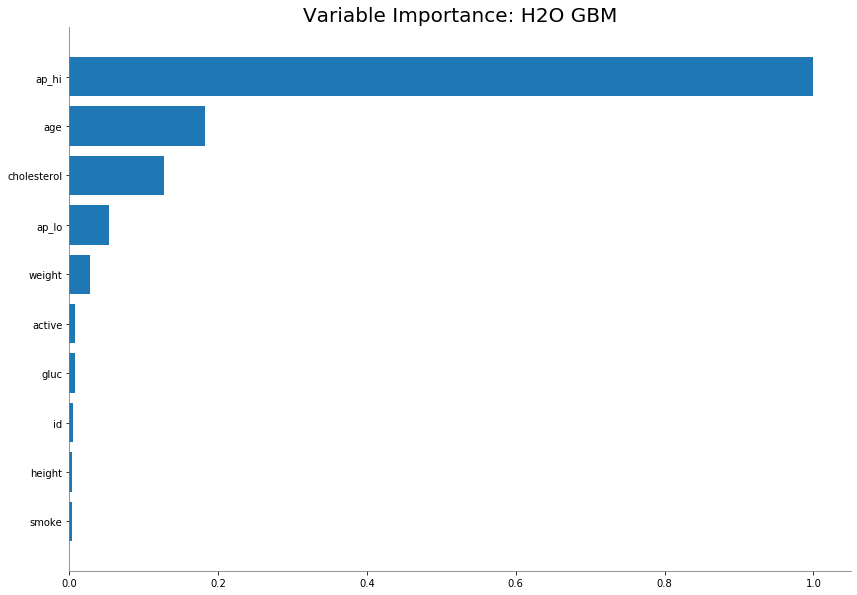

In [37]:
#plotting var importance
gb.varimp_plot()

In [38]:
#evaluation
gb.model_performance(cardioTest)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.18091714833680023
RMSE: 0.4253435650586479
LogLoss: 0.5426995239762797
Mean Per-Class Error: 0.26198891195210194
AUC: 0.7998337417961328
AUCPR: 0.779368098152081
Gini: 0.5996674835922655

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.39869118889470845: 


,,0,1,Error,Rate
0,0,4747.0,2299.0,0.3263,(2299.0/7046.0)
1,1,1515.0,5432.0,0.2181,(1515.0/6947.0)
2,Total,6262.0,7731.0,0.2726,(3814.0/13993.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.398691,0.740155,234.0
1,max f2,0.197359,0.840697,340.0
2,max f0point5,0.562324,0.755092,156.0
3,max accuracy,0.514580,0.738512,177.0
4,max precision,0.925676,1.000000,0.0
5,max recall,0.056597,1.000000,397.0
6,max specificity,0.925676,1.000000,0.0
7,max absolute_mcc,0.533089,0.481493,169.0
8,max min_per_class_accuracy,0.445343,0.730531,212.0
9,max mean_per_class_accuracy,0.514580,0.738011,177.0



Gains/Lift Table: Avg response rate: 49,65 %, avg score: 49,65 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010005,0.887596,1.755276,1.755276,0.871429,0.896160,0.871429,0.896160,0.017562,0.017562,75.527566,75.527566,0.015007
1,2,0.020010,0.881031,1.740888,1.748082,0.864286,0.883930,0.867857,0.890045,0.017418,0.034979,74.088815,74.808191,0.029728
2,3,0.030015,0.876803,1.812826,1.769663,0.900000,0.878810,0.878571,0.886300,0.018137,0.053116,81.282568,76.966316,0.045878
3,4,0.040020,0.872666,1.712113,1.755276,0.850000,0.874599,0.871429,0.883375,0.017130,0.070246,71.211314,75.527566,0.060028
4,5,0.050025,0.869153,1.654563,1.735133,0.821429,0.870820,0.861429,0.880864,0.016554,0.086800,65.456312,73.513315,0.073033
5,6,0.100050,0.854647,1.714991,1.725062,0.851429,0.862029,0.856429,0.871447,0.085792,0.172592,71.499064,72.506190,0.144066
6,7,0.150147,0.841727,1.712544,1.720885,0.850214,0.848410,0.854355,0.863760,0.085792,0.258385,71.254415,72.088534,0.214956
7,8,0.200029,0.825815,1.636218,1.699771,0.812321,0.834076,0.843873,0.856358,0.081618,0.340003,63.621802,69.977145,0.277982
8,9,0.300007,0.728444,1.626950,1.675503,0.807720,0.790859,0.831825,0.834530,0.162660,0.502663,62.695022,67.550349,0.402464
9,10,0.399986,0.541594,1.343314,1.592471,0.666905,0.616010,0.790602,0.779910,0.134303,0.636966,34.331376,59.247089,0.470630


In [39]:
#prediction - de nouveau voir le seuil d'affectation
predGb = gb.predict(cardioTest).as_data_frame()
print(predGb.head(10))

gbm prediction progress: |████████████████████████████████████████████████| 100%
   predict        p0        p1
0        1  0.252751  0.747249
1        0  0.765738  0.234262
2        0  0.657139  0.342861
3        1  0.458098  0.541902
4        1  0.172428  0.827572
5        1  0.141920  0.858080
6        1  0.474475  0.525525
7        1  0.480001  0.519999
8        0  0.631144  0.368856
9        1  0.574867  0.425133


In [40]:
#F1-score
print(metrics.f1_score(cardioTest.as_data_frame()["cardio"],predGb.predict,pos_label=1))

0.7387030806781449


# Modèle 3 : Naive Bayes

In [41]:
#naive bayes
from h2o.estimators import H2ONaiveBayesEstimator

In [42]:
#instanciation
nb = H2ONaiveBayesEstimator(seed=100)

In [43]:
nb.train(x=x, y=y, training_frame=cardioTrain)

naivebayes Model Build progress: |████████████████████████████████████████| 100%


In [44]:
#résumé
nb.summary()


Model Summary: 


,,number_of_response_levels,min_apriori_probability,max_apriori_probability
0,,2.0,0.499491,0.500509


In [45]:
#affichage
nb.show()

Model Details
H2ONaiveBayesEstimator :  Naive Bayes
Model Key:  NaiveBayes_model_python_1611861553922_631


Model Summary: 


,,number_of_response_levels,min_apriori_probability,max_apriori_probability
0,,2.0,0.499491,0.500509




ModelMetricsBinomial: naivebayes
** Reported on train data. **

MSE: 0.28169345048885763
RMSE: 0.5307480103484681
LogLoss: 0.8690611112379693
Mean Per-Class Error: 0.35698028182268904
AUC: 0.6913777373286651
AUCPR: 0.6713060091463037
Gini: 0.3827554746573303

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.11540451312199568: 


,,0,1,Error,Rate
0,0,9081.0,18894.0,0.6754,(18894.0/27975.0)
1,1,3392.0,24640.0,0.121,(3392.0/28032.0)
2,Total,12473.0,43534.0,0.3979,(22286.0/56007.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,1.154045e-01,0.688595,338.0
1,max f2,4.504013e-02,0.834766,386.0
2,max f0point5,1.977122e-01,0.642725,283.0
3,max accuracy,1.977122e-01,0.643045,283.0
4,max precision,9.999240e-01,0.839120,0.0
5,max recall,2.368810e-157,1.000000,399.0
6,max specificity,9.999240e-01,0.995031,0.0
7,max absolute_mcc,1.977122e-01,0.286386,283.0
8,max min_per_class_accuracy,2.072635e-01,0.640054,276.0
9,max mean_per_class_accuracy,1.977122e-01,0.643020,283.0



Gains/Lift Table: Avg response rate: 50,05 %, avg score: 32,94 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010017,0.999982,1.698806,1.698806,0.850267,0.999996,0.850267,0.999996,0.017016,0.017016,69.880583,69.880583,0.014014
1,2,0.020015,0.998017,1.580534,1.639723,0.791071,0.999211,0.820696,0.999603,0.015803,0.032820,58.053430,63.972282,0.025635
2,3,0.030014,0.996548,1.555560,1.611685,0.778571,0.997264,0.806663,0.998824,0.015554,0.048373,55.555972,61.168514,0.036756
3,4,0.040013,0.995218,1.473500,1.577154,0.737500,0.995873,0.789380,0.998087,0.014733,0.063106,47.350037,57.715437,0.046234
4,5,0.050012,0.993469,1.316517,1.525046,0.658929,0.994434,0.763299,0.997356,0.013164,0.076270,31.651728,52.504556,0.052570
5,6,0.100005,0.941324,1.502043,1.513546,0.751786,0.971091,0.757543,0.984226,0.075093,0.151363,50.204275,51.354621,0.102819
6,7,0.149999,0.777058,1.447812,1.491637,0.724643,0.880227,0.746578,0.949564,0.072382,0.223744,44.781223,49.163749,0.147641
7,8,0.200011,0.540389,1.303921,1.444700,0.652624,0.648716,0.723085,0.874339,0.065211,0.288955,30.392109,44.470001,0.178071
8,9,0.299998,0.337618,1.265498,1.384973,0.633393,0.422320,0.693191,0.723684,0.126534,0.415489,26.549778,38.497304,0.231218
9,10,0.400004,0.250205,1.184654,1.334891,0.592930,0.288578,0.668125,0.614902,0.118472,0.533961,18.465401,33.489105,0.268188


In [46]:
#prediction - de nouveau voir le seuil d'affectation
predNb = nb.predict(cardioTest).as_data_frame()
print(predNb.head(10))

naivebayes prediction progress: |█████████████████████████████████████████| 100%
   predict        p0        p1
0        1  0.084216  0.915784
1        1  0.798881  0.201119
2        1  0.791668  0.208332
3        0  0.894575  0.105425
4        0  0.890269  0.109731
5        1  0.832762  0.167238
6        1  0.705882  0.294118
7        1  0.697926  0.302074
8        1  0.823376  0.176624
9        1  0.789719  0.210281


In [47]:
#F1-score
print(metrics.f1_score(cardioTest.as_data_frame()["cardio"],predNb.predict,pos_label=1))

0.6871371147833855


# Modèle 4 : Perceptron simple

In [48]:
#deep learning
from h2o.estimators import H2ODeepLearningEstimator

In [49]:
#instanciation
ps = H2ODeepLearningEstimator(seed=100,epochs=1250,standardize=True,hidden=[],distribution="bernoulli")

In [50]:
#apprentissage
ps.train(x=x, y=y, training_frame=cardioTrain)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [51]:
#structure du réseau
ps.summary()


Status of Neuron Layers: predicting cardio, 2-class classification, bernoulli distribution, CrossEntropy loss, 26 weights/biases, 4,6 KB, 39Â 295Â 113 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,12,Input,0,,,,,,,,,
1,,2,2,Softmax,,0,0,0.00195111,0.00179441,0,-0.150255,1.86727,-0.111204,0.0887527


In [52]:
#affichage
ps.show()

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1611861553922_633


Status of Neuron Layers: predicting cardio, 2-class classification, bernoulli distribution, CrossEntropy loss, 26 weights/biases, 4,6 KB, 39Â 295Â 113 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,12,Input,0,,,,,,,,,
1,,2,2,Softmax,,0,0,0.00195111,0.00179441,0,-0.150255,1.86727,-0.111204,0.0887527




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.1877152429946841
RMSE: 0.4332611718059721
LogLoss: 0.5730983249942956
Mean Per-Class Error: 0.2702326578605818
AUC: 0.7900637098155333
AUCPR: 0.7751398261430212
Gini: 0.5801274196310666

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3916398143706861: 


,,0,1,Error,Rate
0,0,3078.0,1900.0,0.3817,(1900.0/4978.0)
1,1,954.0,4010.0,0.1922,(954.0/4964.0)
2,Total,4032.0,5910.0,0.2871,(2854.0/9942.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.391640,0.737539,249.0
1,max f2,0.149998,0.837336,357.0
2,max f0point5,0.532697,0.743192,184.0
3,max accuracy,0.487945,0.729833,203.0
4,max precision,0.977246,0.896552,8.0
5,max recall,0.001663,1.000000,399.0
6,max specificity,0.999342,0.999397,0.0
7,max absolute_mcc,0.512028,0.462207,193.0
8,max min_per_class_accuracy,0.453200,0.726027,219.0
9,max mean_per_class_accuracy,0.487945,0.729767,203.0



Gains/Lift Table: Avg response rate: 49,93 %, avg score: 49,56 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010058,0.987615,1.762482,1.762482,0.880000,0.993598,0.880000,0.993598,0.017728,0.017728,76.248187,76.248187,0.015317
1,2,0.020016,0.970178,1.780285,1.771339,0.888889,0.978990,0.884422,0.986331,0.017728,0.035455,78.028472,77.133856,0.030835
2,3,0.030074,0.956114,1.662341,1.734884,0.830000,0.963481,0.866221,0.978689,0.016720,0.052176,66.234085,73.488448,0.044140
3,4,0.040032,0.941471,1.780285,1.746178,0.888889,0.948741,0.871859,0.971239,0.017728,0.069903,78.028472,74.617750,0.059658
4,5,0.050091,0.928197,1.722425,1.741408,0.860000,0.934107,0.869478,0.963783,0.017325,0.087228,72.242546,74.140802,0.074171
5,6,0.100080,0.862976,1.716703,1.729068,0.857143,0.895728,0.863317,0.929790,0.085818,0.173046,71.670312,72.906798,0.145726
6,7,0.150070,0.811097,1.644166,1.700786,0.820926,0.837799,0.849196,0.899147,0.082192,0.255238,64.416637,70.078641,0.210039
7,8,0.200060,0.757373,1.652226,1.688652,0.824950,0.784118,0.843137,0.870404,0.082595,0.337832,65.222601,68.865242,0.275157
8,9,0.300040,0.648628,1.551481,1.642944,0.774648,0.701320,0.820315,0.814061,0.155117,0.492949,55.148052,64.294378,0.385275
9,10,0.400020,0.538989,1.317751,1.561666,0.657948,0.593448,0.779733,0.758922,0.131749,0.624698,31.775099,56.166602,0.448724




Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2021-01-28 20:21:56,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2021-01-28 20:21:56,0.455 sec,529063 obs/sec,1.785366,1,99993.0,0.434226,0.579296,0.245788,0.788752,0.771537,1.742454,0.291289
2,,2021-01-28 20:22:01,5.471 sec,753827 obs/sec,69.626118,39,3899550.0,0.433826,0.575025,0.247179,0.789223,0.773371,1.782510,0.285657
3,,2021-01-28 20:22:06,10.467 sec,768257 obs/sec,139.270484,78,7800122.0,0.433400,0.574383,0.248657,0.789842,0.775138,1.802538,0.282941
4,,2021-01-28 20:22:11,15.503 sec,772554 obs/sec,208.880836,117,11698789.0,0.433278,0.573832,0.249078,0.789949,0.773920,1.742454,0.289077
5,,2021-01-28 20:22:16,20.549 sec,773781 obs/sec,278.499009,156,15597894.0,0.433478,0.573416,0.248386,0.789630,0.774267,1.742454,0.286964
6,,2021-01-28 20:22:21,25.658 sec,776583 obs/sec,349.918189,196,19597868.0,0.433261,0.573098,0.249138,0.790064,0.775140,1.762482,0.287065
7,,2021-01-28 20:22:26,30.700 sec,777261 obs/sec,419.544093,235,23497406.0,0.432951,0.575570,0.250211,0.790895,0.774913,1.762482,0.282639
8,,2021-01-28 20:22:31,35.812 sec,780054 obs/sec,490.941329,275,27496151.0,0.433456,0.574392,0.248462,0.790153,0.774511,1.742454,0.283746
9,,2021-01-28 20:22:36,40.936 sec,779458 obs/sec,560.569161,314,31395797.0,0.433914,0.576297,0.246872,0.789754,0.775015,1.802538,0.289781



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,ap_hi,1.000000,1.000000,0.248718
1,alco,0.545083,0.545083,0.135572
2,smoke,0.523521,0.523521,0.130209
3,weight,0.409243,0.409243,0.101786
4,ap_lo,0.360910,0.360910,0.089765
5,cholesterol,0.280050,0.280050,0.069653
6,height,0.209698,0.209698,0.052156
7,age,0.167012,0.167012,0.041539
8,active,0.166398,0.166398,0.041386
9,gender,0.161450,0.161450,0.040155


In [53]:
#prediction - de nouveau voir le seuil d'affectation
predps = ps.predict(cardioTest).as_data_frame()
print(predps.head(10))

deeplearning prediction progress: |███████████████████████████████████████| 100%
   predict        p0        p1
0        1  0.255547  0.744453
1        0  0.729474  0.270526
2        1  0.558120  0.441880
3        1  0.546701  0.453299
4        1  0.401929  0.598071
5        1  0.227847  0.772153
6        1  0.407444  0.592556
7        1  0.481153  0.518847
8        1  0.577451  0.422549
9        0  0.683000  0.317000


In [54]:
performance = ps.model_performance(cardioTest)
performance.show()


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.18899419564027498
RMSE: 0.4347346266865281
LogLoss: 0.5869692943396676
Mean Per-Class Error: 0.27062963565712095
AUC: 0.7875997051762216
AUCPR: 0.7665084120455569
Gini: 0.5751994103524432

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4007850108718426: 


,,0,1,Error,Rate
0,0,4485.0,2561.0,0.3635,(2561.0/7046.0)
1,1,1423.0,5524.0,0.2048,(1423.0/6947.0)
2,Total,5908.0,8085.0,0.2847,(3984.0/13993.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.400785,0.734965,242.0
1,max f2,0.182941,0.835183,347.0
2,max f0point5,0.546029,0.739567,177.0
3,max accuracy,0.474248,0.729579,208.0
4,max precision,0.991087,0.864407,3.0
5,max recall,0.001352,1.000000,399.0
6,max specificity,0.999411,0.998723,0.0
7,max absolute_mcc,0.474248,0.459621,208.0
8,max min_per_class_accuracy,0.451860,0.727505,218.0
9,max mean_per_class_accuracy,0.474248,0.729370,208.0



Gains/Lift Table: Avg response rate: 49,65 %, avg score: 49,51 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010005,9.878694e-01,1.697726,1.697726,0.842857,0.994258,0.842857,0.994258,0.016986,0.016986,69.772564,69.772564,0.013863
1,2,0.020010,9.730481e-01,1.625788,1.661757,0.807143,0.980230,0.825000,0.987244,0.016266,0.033252,62.578811,66.175687,0.026297
2,3,0.030015,9.581317e-01,1.726501,1.683338,0.857143,0.965762,0.835714,0.980083,0.017274,0.050525,72.650065,68.333813,0.040733
3,4,0.040020,9.435820e-01,1.812826,1.715710,0.900000,0.951003,0.851786,0.972813,0.018137,0.068663,81.282568,71.571002,0.056883
4,5,0.050025,9.280242e-01,1.740888,1.720746,0.864286,0.935716,0.854286,0.965394,0.017418,0.086080,74.088815,72.074565,0.071604
5,6,0.100050,8.654409e-01,1.729378,1.725062,0.858571,0.896148,0.856429,0.930771,0.086512,0.172592,72.937815,72.506190,0.144066
6,7,0.150004,8.079646e-01,1.645404,1.698534,0.816881,0.836560,0.843259,0.899398,0.082194,0.254786,64.540369,69.853446,0.208093
7,8,0.200029,7.512582e-01,1.668951,1.691136,0.828571,0.779018,0.839586,0.869292,0.083489,0.338276,66.895063,69.113586,0.274551
8,9,0.300007,6.415994e-01,1.546323,1.642876,0.767691,0.698003,0.815626,0.812209,0.154599,0.492875,54.632260,64.287627,0.383025
9,10,0.399986,5.364349e-01,1.318838,1.561881,0.654753,0.589484,0.775415,0.756538,0.131855,0.624730,31.883752,56.188106,0.446331


In [55]:
#F1-score
print(metrics.f1_score(cardioTest.as_data_frame()["cardio"],predps.predict,pos_label=1))

0.7326002502139988


# Modèle 5 : H2OAutoML

In [56]:
#chargement de la classe
from h2o.automl import H2OAutoML

In [57]:
#instanciation
aml = H2OAutoML(seed=100,nfolds=5,max_runtime_secs=180)

In [58]:
#lancement des calculs
aml.train(x=x, y=y, training_frame=cardioTrain)

AutoML progress: |
20:23:05.31: AutoML: XGBoost is not available; skipping it.

███████
20:23:27.531: GBM_1_AutoML_20210128_202305 [GBM def_1] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_1_AutoML_20210128_202305_cv_1.  Details: ERRR on field: _ntrees: The tree model will not fit in the driver node's memory ( 770  B per tree x 10000 > 2,0 MB) - try decreasing ntrees and/or max_depth or increasing min_rows!


█
20:23:31.242: GBM_2_AutoML_20210128_202305 [GBM def_2] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_2_AutoML_20210128_202305_cv_1.  Details: ERRR on field: _ntrees: The tree model will not fit in the driver node's memory (1,2 KB per tree x 10000 > 11,7 MB) - try decreasing ntrees and/or max_depth or increasing min_rows!


█
20:23:33.742: GBM_3_AutoML_20210128_202305 [GBM def_3] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s)

In [59]:
#récupérer le tableau des modèles
lb = aml.leaderboard

In [60]:
#nombre de modèles
print(lb.nrow) #35

5


In [61]:
#afficher les modèles -- tri par défaut AUC pour le classement binaire
result = lb.head(rows=lb.nrow).as_data_frame()
result.loc[:,["model_id","auc"]]

,model_id,auc
0,StackedEnsemble_BestOfFamily_AutoML_20210128_202305,0.783956
1,StackedEnsemble_AllModels_AutoML_20210128_202305,0.783908
2,GBM_5_AutoML_20210128_202305,0.765696
3,DRF_1_AutoML_20210128_202305,0.735211
4,GLM_1_AutoML_20210128_202305,0.712019


In [62]:
#meilleur modèle
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_AutoML_20210128_202305

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.15071948299201818
RMSE: 0.38822607201477105
LogLoss: 0.4751235241757313
Null degrees of freedom: 9939
Residual degrees of freedom: 9936
Null deviance: 13779.853592633595
Residual deviance: 9445.455660613537
AIC: 9453.455660613537
AUC: 0.8856432242227588
AUCPR: 0.8870851323966201
Gini: 0.7712864484455175

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4635565176469616: 


,,0,1,Error,Rate
0,0,3934.0,1055.0,0.2115,(1055.0/4989.0)
1,1,872.0,4079.0,0.1761,(872.0/4951.0)
2,Total,4806.0,5134.0,0.1939,(1927.0/9940.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.463557,0.808924,219.0
1,max f2,0.289765,0.869052,311.0
2,max f0point5,0.580201,0.828292,164.0
3,max accuracy,0.482159,0.806942,210.0
4,max precision,0.919440,1.000000,0.0
5,max recall,0.122218,1.000000,394.0
6,max specificity,0.919440,1.000000,0.0
7,max absolute_mcc,0.500040,0.613947,202.0
8,max min_per_class_accuracy,0.476800,0.805171,212.0
9,max mean_per_class_accuracy,0.482159,0.806924,210.0



Gains/Lift Table: Avg response rate: 49,81 %, avg score: 50,01 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.01006,0.883787,2.007675,2.007675,1.000000,0.898123,1.000000,0.898123,0.020198,0.020198,100.767522,100.767522,0.020198
1,2,0.02002,0.870832,1.987396,1.997586,0.989899,0.877054,0.994975,0.887641,0.019794,0.039992,98.739567,99.758640,0.039791
2,3,0.03008,0.860339,1.967522,1.987531,0.980000,0.865244,0.989967,0.880151,0.019794,0.059786,96.752171,98.753132,0.059185
3,4,0.04004,0.850436,2.007675,1.992542,1.000000,0.855378,0.992462,0.873989,0.019996,0.079782,100.767522,99.254199,0.079181
4,5,0.05000,0.840975,1.906277,1.975359,0.949495,0.845608,0.983903,0.868335,0.018986,0.098768,90.627748,97.535851,0.097164
5,6,0.10000,0.805348,1.934963,1.955161,0.963783,0.822788,0.973843,0.845562,0.096748,0.195516,93.496263,95.516057,0.190305
6,7,0.15000,0.771333,1.866290,1.925537,0.929577,0.788759,0.959088,0.826627,0.093314,0.288831,86.628964,92.553693,0.276604
7,8,0.20000,0.739209,1.846092,1.905676,0.919517,0.755287,0.949195,0.808792,0.092305,0.381135,84.609170,90.567562,0.360891
8,9,0.30000,0.668062,1.684508,1.831953,0.839034,0.704440,0.912475,0.774008,0.168451,0.549586,68.450818,83.195314,0.497271
9,10,0.40000,0.574115,1.478489,1.743587,0.736419,0.622559,0.868461,0.736146,0.147849,0.697435,47.848919,74.358715,0.592604




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.18929272668449465
RMSE: 0.43507783979937964
LogLoss: 0.562530512850381
Null degrees of freedom: 56006
Residual degrees of freedom: 56003
Null deviance: 77644.3490855284
Residual deviance: 63011.29286642258
AIC: 63019.29286642258
AUC: 0.7839564658136137
AUCPR: 0.762030486611559
Gini: 0.5679129316272273

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3806691560716026: 


,,0,1,Error,Rate
0,0,16114.0,11861.0,0.424,(11861.0/27975.0)
1,1,4935.0,23097.0,0.176,(4935.0/28032.0)
2,Total,21049.0,34958.0,0.2999,(16796.0/56007.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.380669,0.733355,257.0
1,max f2,0.202481,0.840255,350.0
2,max f0point5,0.575935,0.733556,170.0
3,max accuracy,0.505319,0.723142,199.0
4,max precision,0.920925,0.878788,5.0
5,max recall,0.073142,1.000000,398.0
6,max specificity,0.942585,0.999964,0.0
7,max absolute_mcc,0.526661,0.447685,190.0
8,max min_per_class_accuracy,0.479657,0.720962,211.0
9,max mean_per_class_accuracy,0.505319,0.723168,199.0



Gains/Lift Table: Avg response rate: 50,05 %, avg score: 50,05 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010017,0.901120,1.688122,1.688122,0.844920,0.914486,0.844920,0.914486,0.016909,0.016909,68.812152,68.812152,0.013799
1,2,0.020015,0.885228,1.687568,1.687845,0.844643,0.892721,0.844781,0.903613,0.016874,0.033783,68.756823,68.784512,0.027563
2,3,0.030014,0.874301,1.684000,1.686564,0.842857,0.879566,0.844140,0.895602,0.016838,0.050621,68.400043,68.656432,0.041255
3,4,0.040013,0.865285,1.666161,1.681466,0.833929,0.869610,0.841589,0.889107,0.016660,0.067280,66.616144,68.146587,0.054590
4,5,0.050012,0.856760,1.687568,1.682686,0.844643,0.860985,0.842199,0.883485,0.016874,0.084154,68.756823,68.268591,0.068354
5,6,0.100005,0.819206,1.691136,1.686910,0.846429,0.837355,0.844314,0.860424,0.084546,0.168700,69.113602,68.691021,0.137529
6,7,0.149999,0.785273,1.646895,1.673574,0.824286,0.801964,0.837638,0.840940,0.082334,0.251035,64.689533,67.357351,0.202277
7,8,0.200011,0.752190,1.590670,1.652844,0.796144,0.768917,0.827263,0.822931,0.079552,0.330586,59.066960,65.284383,0.261418
8,9,0.299998,0.676185,1.532012,1.612571,0.766786,0.715138,0.807106,0.787004,0.153182,0.483769,53.201225,61.257143,0.367915
9,10,0.400004,0.581822,1.312715,1.537604,0.657026,0.630318,0.769584,0.747831,0.131279,0.615047,31.271507,53.760400,0.430525


In [63]:
#prédiction sur le test
predAml = aml.predict(cardioTest).as_data_frame()
print(predAml.head(10))

stackedensemble prediction progress: |████████████████████████████████████| 100%
   predict        p0        p1
0        1  0.380239  0.619761
1        0  0.621306  0.378694
2        0  0.694760  0.305240
3        1  0.561358  0.438642
4        1  0.299229  0.700771
5        1  0.252403  0.747597
6        1  0.380064  0.619936
7        1  0.523493  0.476507
8        1  0.595332  0.404668
9        1  0.511398  0.488602


In [64]:
#F1-score
print(metrics.f1_score(cardioTest.as_data_frame()["cardio"],predAml.predict,pos_label=1))

0.7310084825636193


# FIN DE PROJET